In [79]:
# Load libraries
from sklearn import datasets
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
print('Libraries Imported')

Libraries Imported


In [40]:
training_data = pd.read_csv("train-1542197608821.csv")
training_data.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,0.705435,12.5628,2.0724,True,F,0.445318,False,UE,mens,8644
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,3.856600,12.3544,5.1124,False,B,0.432434,False,FE,mens,1182
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,2.908892,13.8620,1.6564,False,F,0.397538,True,FE,mens,9042
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,0.557554,14.2596,0.1606,True,B,0.671984,True,UE,mens,1222
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,3.945317,11.3658,1.1082,False,F,0.340411,False,W,mens,4085


In [41]:
training_data.rename(columns={'net.clearance': 'netClearance', 'outside.sideline': 'outsideSideline', 'outside.baseline': 'outsideBaseline'}, inplace=True)
training_data.columns.values

array(['rally', 'serve', 'hitpoint', 'speed', 'netClearance',
       'distance.from.sideline', 'depth', 'outsideSideline',
       'outsideBaseline', 'player.distance.travelled',
       'player.impact.depth', 'player.impact.distance.from.center',
       'player.depth', 'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth',
       'opponent.distance.from.center', 'same.side', 'previous.hitpoint',
       'previous.time.to.net', 'server.is.impact.player', 'outcome',
       'gender', 'ID'], dtype=object)

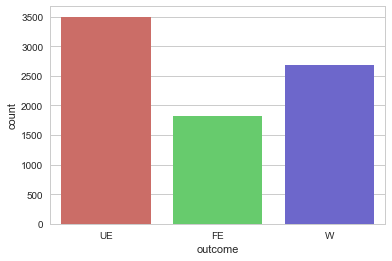

In [42]:
sns.countplot(x=training_data['outcome'],data=training_data, palette='hls')
plt.show()

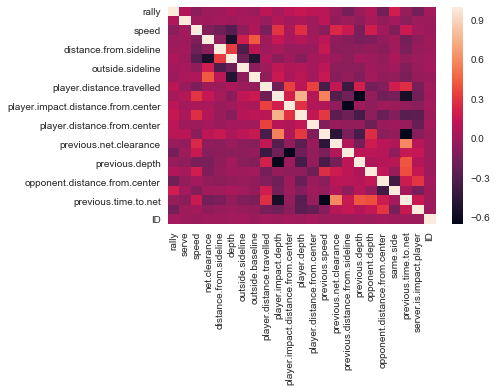

In [38]:
sns.heatmap(training_data.corr())
plt.show()

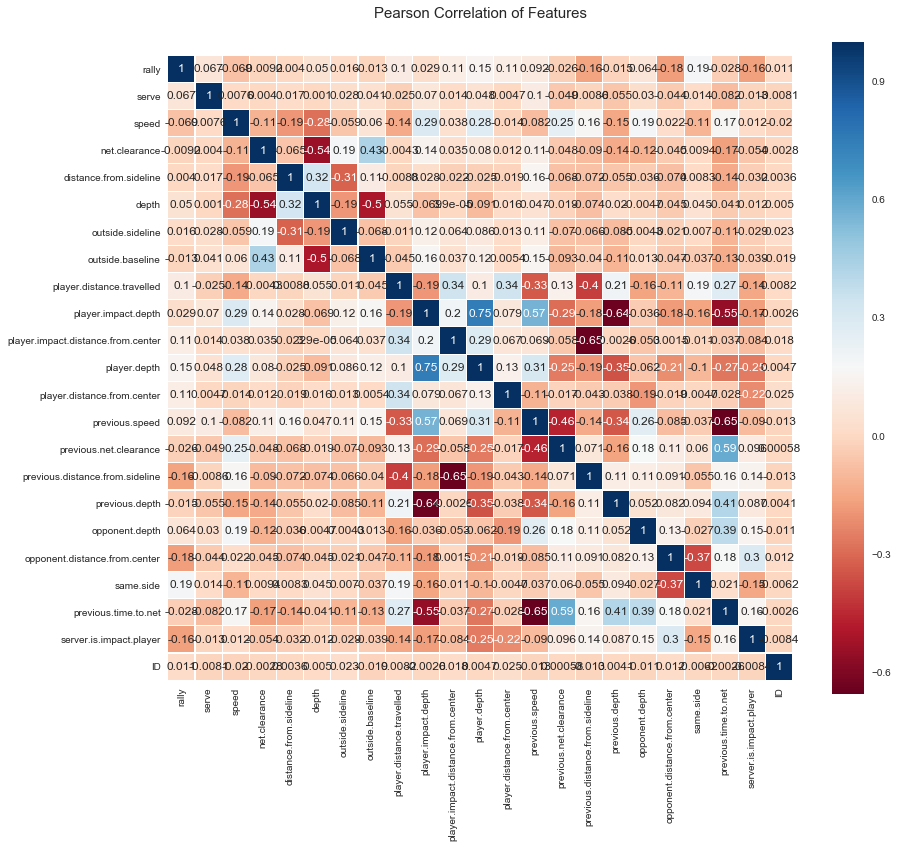

In [39]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(training_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [6]:
training_data.dtypes

rally                                   int64
serve                                   int64
hitpoint                               object
speed                                 float64
netClearance                          float64
distance.from.sideline                float64
depth                                 float64
outsideSideline                          bool
outsideBaseline                          bool
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                                bool
previous.hitpoint                 

# Dropping Incorrect records from train data - for better training model

# # They are:
### a.) When net.clearance < 0 and outcome == W : 48 Such RECORDS. 
### b.) When outside.baseline=TRUE, then it is a error, ending rally, so remove records where Outcome == W and outside.baseline == True : 20 Such Records
### c.) When outside.sidelline == TRUE and Outcome == Winner : 9 records 

In [7]:
training_data.shape

(8001, 27)

In [8]:
training_data[(training_data.outcome == 'W') & (training_data.netClearance < 0.0)].count()

rally                                 48
serve                                 48
hitpoint                              48
speed                                 48
netClearance                          48
distance.from.sideline                48
depth                                 48
outsideSideline                       48
outsideBaseline                       48
player.distance.travelled             48
player.impact.depth                   48
player.impact.distance.from.center    48
player.depth                          48
player.distance.from.center           48
previous.speed                        48
previous.net.clearance                48
previous.distance.from.sideline       48
previous.depth                        48
opponent.depth                        48
opponent.distance.from.center         48
same.side                             48
previous.hitpoint                     48
previous.time.to.net                  48
server.is.impact.player               48
outcome         

In [43]:
training_data.drop(training_data[ (training_data.outcome == 'W') & (training_data.netClearance < 0.0)].index, inplace=True)

In [44]:
training_data.shape

(7953, 27)

In [11]:
training_data[ (training_data.outcome == 'W') & (training_data.outsideBaseline) ]

,rally,serve,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
137,4,2,B,38.067721,0.503376,1.247838,0.054719,False,True,2.944265,...,4.097003,12.6572,1.7902,False,F,0.492360,False,W,mens,547
401,6,2,F,39.912138,0.617764,1.482524,0.080177,False,True,2.018518,...,4.546583,13.1684,3.2348,False,F,0.502348,False,W,mens,4789
740,18,2,F,37.057220,0.991396,0.657036,0.057976,False,True,3.502804,...,5.202198,14.5712,2.4410,True,F,0.503091,False,W,mens,8281
1138,3,1,F,39.196247,0.955831,0.126016,0.100417,False,True,0.802088,...,4.565487,11.8836,3.8290,False,F,0.733682,True,W,mens,6528
1278,9,2,B,20.738478,1.241219,0.561777,0.617471,False,True,0.000000,...,0.481118,10.7796,2.4882,False,B,0.470535,True,W,mens,2686
1639,9,1,B,37.787812,0.687539,1.042705,0.112662,False,True,2.957832,...,6.321104,11.8122,2.5300,False,F,0.564786,True,W,mens,3887
1773,4,1,F,41.526229,0.637051,0.604297,4.010822,True,True,3.486108,...,5.653233,13.3300,4.1098,False,F,0.423889,False,W,mens,1174
1836,6,1,F,41.125927,0.707137,0.788713,0.116381,False,True,3.937907,...,4.603407,13.2816,2.5690,False,B,0.887937,False,W,mens,3481
2811,14,2,F,38.017521,0.602595,0.214654,0.086217,False,True,5.488942,...,7.078490,14.0284,2.7740,True,B,0.763738,False,W,mens,6390
2990,6,2,B,41.096861,0.543494,1.023181,0.071144,False,True,3.634182,...,4.573088,13.4470,0.7546,False,F,0.520972,False,W,mens,8314


In [45]:
training_data.drop(training_data[ (training_data.outcome == 'W') & (training_data.outsideBaseline)].index, inplace=True)
training_data.shape

(7933, 27)

In [13]:
training_data[ (training_data.outcome == 'W') & (training_data.outsideSideline) ]

,rally,serve,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
365,3,1,B,38.101442,0.158981,0.054729,4.938593,True,False,2.327890,...,4.239554,12.6316,4.5510,False,F,0.480285,True,W,mens,6122
4049,8,1,F,22.057119,0.346722,0.598800,2.317013,True,False,5.768883,...,7.969548,3.5462,0.2000,True,B,0.445475,False,W,womens,6126
5224,3,1,B,30.396477,0.476261,0.054853,2.705095,True,False,2.625619,...,4.569675,12.6260,2.7720,False,F,0.501648,True,W,womens,3874
7050,3,1,V,36.741422,0.049600,0.065542,11.845207,True,False,4.079427,...,2.466945,13.5214,3.0082,False,F,0.825738,True,W,womens,6283
7106,7,2,B,25.372404,0.042368,0.057968,6.473309,True,False,1.317925,...,7.270360,12.3918,0.2376,False,V,0.488718,True,W,womens,9700


In [46]:
training_data.drop(training_data[ (training_data.outcome == 'W') & (training_data.outsideSideline)].index, inplace=True)
training_data.shape

(7928, 27)

# # Thus original training dataset reduced to 7928 records from 8001, 73 deficit i.e. 0.91 % data reduced.
# We are still good as features are 25 to train, which will be reduced based on domain info.


In [15]:
training_data.columns.values

array(['rally', 'serve', 'hitpoint', 'speed', 'netClearance',
       'distance.from.sideline', 'depth', 'outsideSideline',
       'outsideBaseline', 'player.distance.travelled',
       'player.impact.depth', 'player.impact.distance.from.center',
       'player.depth', 'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth',
       'opponent.distance.from.center', 'same.side', 'previous.hitpoint',
       'previous.time.to.net', 'server.is.impact.player', 'outcome',
       'gender', 'ID'], dtype=object)

In [16]:
training_data.columns.shape

(27,)

In [47]:
# Dropping id and gender and serve from feature set:
## Reason :
### the game of tennis has same scoring irrespective of gender.
### ID is not required
### serve doesn't affect the outcome as the minimum rally no. is 3 ==> All serves are successful.

training_data.drop(['ID','gender', 'serve'], inplace=True, axis=1)
training_data.columns.shape

(24,)

In [48]:
training_data.head()

,rally,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,player.impact.depth,...,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome
0,4,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,14.1758,...,1.350533,2.449182,0.705435,12.5628,2.0724,True,F,0.445318,False,UE
1,4,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,12.7396,...,0.760499,0.583291,3.856600,12.3544,5.1124,False,B,0.432434,False,FE
2,23,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,15.3782,...,0.377732,1.115250,2.908892,13.8620,1.6564,False,F,0.397538,True,FE
3,9,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,13.7308,...,1.239033,3.256695,0.557554,14.2596,0.1606,True,B,0.671984,True,UE
4,4,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,15.1992,...,0.165731,1.431146,3.945317,11.3658,1.1082,False,F,0.340411,False,W


# Converting Types to Categorical

In [49]:
training_data.dtypes

rally                                   int64
hitpoint                               object
speed                                 float64
netClearance                          float64
distance.from.sideline                float64
depth                                 float64
outsideSideline                          bool
outsideBaseline                          bool
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                                bool
previous.hitpoint                      object
previous.time.to.net              

In [50]:
training_data[training_data.select_dtypes(['object']).columns] = training_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
training_data.dtypes

rally                                    int64
hitpoint                              category
speed                                  float64
netClearance                           float64
distance.from.sideline                 float64
depth                                  float64
outsideSideline                           bool
outsideBaseline                           bool
player.distance.travelled              float64
player.impact.depth                    float64
player.impact.distance.from.center     float64
player.depth                           float64
player.distance.from.center            float64
previous.speed                         float64
previous.net.clearance                 float64
previous.distance.from.sideline        float64
previous.depth                         float64
opponent.depth                         float64
opponent.distance.from.center          float64
same.side                                 bool
previous.hitpoint                     category
previous.time

In [51]:
training_data[training_data.select_dtypes(['bool']).columns] = training_data.select_dtypes(['bool']).apply(lambda x: x.astype('category'))
training_data.dtypes

rally                                    int64
hitpoint                              category
speed                                  float64
netClearance                           float64
distance.from.sideline                 float64
depth                                  float64
outsideSideline                       category
outsideBaseline                       category
player.distance.travelled              float64
player.impact.depth                    float64
player.impact.distance.from.center     float64
player.depth                           float64
player.distance.from.center            float64
previous.speed                         float64
previous.net.clearance                 float64
previous.distance.from.sideline        float64
previous.depth                         float64
opponent.depth                         float64
opponent.distance.from.center          float64
same.side                             category
previous.hitpoint                     category
previous.time

# More Exploratory Data Analysis

In [52]:
training_data.describe()

,rally,speed,netClearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,previous.time.to.net
count,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000,7928.000000
mean,5.964556,30.816840,0.634988,1.466773,4.410864,2.687018,11.903757,1.918814,12.254524,1.211980,28.779762,0.820905,2.193556,4.222121,12.621616,2.366863,0.550141
std,3.547494,7.272464,0.982758,1.108783,3.131815,1.705747,2.784857,1.204410,2.041026,0.962283,6.462778,0.675174,1.038914,2.054932,2.067895,1.313181,0.186863
min,3.000000,5.340688,-0.998184,0.000497,0.003135,0.000000,2.156000,0.000200,1.389800,0.000400,8.449117,0.028865,0.000164,0.000467,2.161200,0.000200,0.003201
25%,3.000000,26.778784,-0.026883,0.537544,1.642445,1.445852,11.224100,0.942550,11.372900,0.551500,24.069258,0.404140,1.353810,2.737670,12.084700,1.351900,0.432134
50%,5.000000,32.424108,0.448471,1.208321,3.851840,2.359860,12.692400,1.829500,12.557300,0.983300,29.803213,0.657700,2.169584,4.129470,12.902400,2.330200,0.507933
75%,7.000000,35.669978,0.975724,2.213182,7.016755,3.558147,13.555450,2.745500,13.498800,1.594850,33.582167,1.020482,3.022189,5.603455,13.713000,3.258850,0.624635
max,38.000000,55.052795,12.815893,7.569757,11.886069,14.480546,18.125600,7.746200,18.745800,9.352600,54.207506,6.730275,4.114361,9.997963,20.211000,6.852600,1.635257


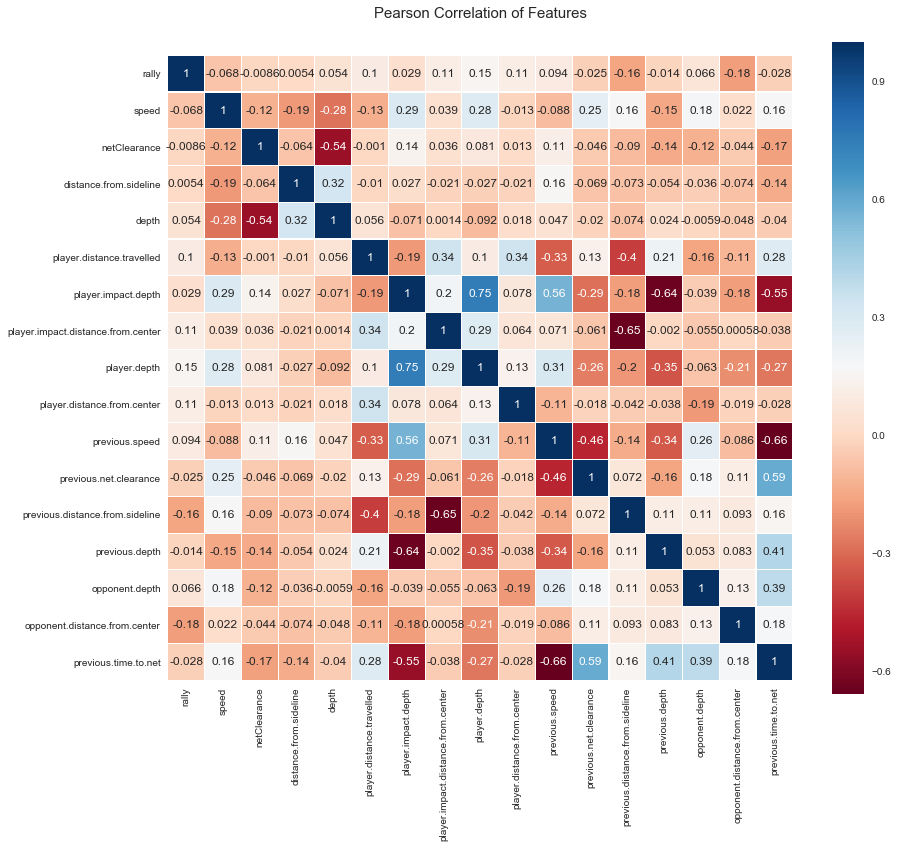

In [36]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(training_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# # Proceeding WITH Dummification

In [53]:
#Creating the dependent variable class
factor = pd.factorize(training_data['outcome'])
training_data.outcome = factor[0]
definitions = factor[1]
print(training_data.outcome.head())
print(definitions)

0    0
1    1
2    1
3    0
4    2
Name: outcome, dtype: int64
CategoricalIndex(['UE', 'FE', 'W'], categories=['FE', 'UE', 'W'], ordered=False, dtype='category')


In [54]:
factor

(array([0, 1, 1, ..., 2, 2, 0], dtype=int64),
 CategoricalIndex(['UE', 'FE', 'W'], categories=['FE', 'UE', 'W'], ordered=False, dtype='category'))

In [55]:
training_data[:-1].head()

,rally,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,player.impact.depth,...,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome
0,4,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,14.1758,...,1.350533,2.449182,0.705435,12.5628,2.0724,True,F,0.445318,False,0
1,4,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,12.7396,...,0.760499,0.583291,3.856600,12.3544,5.1124,False,B,0.432434,False,1
2,23,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,15.3782,...,0.377732,1.115250,2.908892,13.8620,1.6564,False,F,0.397538,True,1
3,9,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,13.7308,...,1.239033,3.256695,0.557554,14.2596,0.1606,True,B,0.671984,True,0
4,4,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,15.1992,...,0.165731,1.431146,3.945317,11.3658,1.1082,False,F,0.340411,False,2


In [56]:
training_data.columns.shape

(24,)

In [57]:
# NOT Dropping features  - LETs see the impact
train_data_copy = training_data.copy(deep=False)
#train_data_copy.drop(['hitpoint','previous.hitpoint', 'distance.from.sideline', 'previous.distance.from.sideline', 'previous.time.to.net'], inplace=True, axis=1)
train_data_copy.shape

(7928, 24)

In [58]:
training_data.shape

(7928, 24)

# Work with train_data_copy : Just like that.

In [59]:
train_data_copy.head()

,rally,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,player.impact.depth,...,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome
0,4,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,14.1758,...,1.350533,2.449182,0.705435,12.5628,2.0724,True,F,0.445318,False,0
1,4,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,12.7396,...,0.760499,0.583291,3.856600,12.3544,5.1124,False,B,0.432434,False,1
2,23,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,15.3782,...,0.377732,1.115250,2.908892,13.8620,1.6564,False,F,0.397538,True,1
3,9,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,13.7308,...,1.239033,3.256695,0.557554,14.2596,0.1606,True,B,0.671984,True,0
4,4,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,15.1992,...,0.165731,1.431146,3.945317,11.3658,1.1082,False,F,0.340411,False,2


# Dummification

In [60]:
train_feature_set = train_data_copy.copy(deep=True)
train_feature_set.drop(['outcome'], inplace=True, axis=1)
train_feature_set.head()

,rally,hitpoint,speed,netClearance,distance.from.sideline,depth,outsideSideline,outsideBaseline,player.distance.travelled,player.impact.depth,...,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player
0,4,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,14.1758,...,32.313592,1.350533,2.449182,0.705435,12.5628,2.0724,True,F,0.445318,False
1,4,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,12.7396,...,34.060788,0.760499,0.583291,3.856600,12.3544,5.1124,False,B,0.432434,False
2,23,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,15.3782,...,39.806628,0.377732,1.115250,2.908892,13.8620,1.6564,False,F,0.397538,True
3,9,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,13.7308,...,25.018818,1.239033,3.256695,0.557554,14.2596,0.1606,True,B,0.671984,True
4,4,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,15.1992,...,36.790979,0.165731,1.431146,3.945317,11.3658,1.1082,False,F,0.340411,False


In [61]:
gen_onehot_features = pd.get_dummies(train_feature_set)
gen_onehot_features.head()

,rally,speed,netClearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,outsideBaseline_False,outsideBaseline_True,same.side_False,same.side_True,previous.hitpoint_B,previous.hitpoint_F,previous.hitpoint_U,previous.hitpoint_V,server.is.impact.player_False,server.is.impact.player_True
0,4,35.515042,-0.021725,3.474766,6.797621,1.467570,14.1758,1.1448,13.6704,0.2330,...,1,0,0,1,0,1,0,0,1,0
1,4,33.382640,1.114202,2.540801,2.608708,2.311931,12.7396,4.6258,12.6358,2.3162,...,0,1,1,0,1,0,0,0,1,0
2,23,22.316690,-0.254046,3.533166,9.435749,3.903728,15.3782,1.4336,13.6996,2.0908,...,1,0,1,0,0,1,0,0,0,1
3,9,36.837309,0.766694,0.586885,3.342180,0.583745,13.7308,0.0312,13.1492,0.0188,...,1,0,0,1,1,0,0,0,0,1
4,4,35.544208,0.116162,0.918725,5.499119,2.333456,15.1992,1.7596,14.1310,0.3150,...,1,0,1,0,0,1,0,0,1,0


In [62]:
# Dropping Unnecessary Coloumns in order to curb curse of Dimensionality !
gen_onehot_features.drop(['outsideBaseline_False','same.side_False','previous.hitpoint_U', 'server.is.impact.player_False'], inplace=True, axis=1)
gen_onehot_features.head()

,rally,speed,netClearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,hitpoint_U,hitpoint_V,outsideSideline_False,outsideSideline_True,outsideBaseline_True,same.side_True,previous.hitpoint_B,previous.hitpoint_F,previous.hitpoint_V,server.is.impact.player_True
0,4,35.515042,-0.021725,3.474766,6.797621,1.467570,14.1758,1.1448,13.6704,0.2330,...,0,0,1,0,0,1,0,1,0,0
1,4,33.382640,1.114202,2.540801,2.608708,2.311931,12.7396,4.6258,12.6358,2.3162,...,0,0,1,0,1,0,1,0,0,0
2,23,22.316690,-0.254046,3.533166,9.435749,3.903728,15.3782,1.4336,13.6996,2.0908,...,0,0,1,0,0,0,0,1,0,1
3,9,36.837309,0.766694,0.586885,3.342180,0.583745,13.7308,0.0312,13.1492,0.0188,...,0,0,0,1,0,1,1,0,0,1
4,4,35.544208,0.116162,0.918725,5.499119,2.333456,15.1992,1.7596,14.1310,0.3150,...,0,0,1,0,0,0,0,1,0,0


In [63]:
gen_onehot_features.drop(['outsideSideline_False','hitpoint_U'], inplace=True, axis=1)
gen_onehot_features.head()

,rally,speed,netClearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,hitpoint_B,hitpoint_F,hitpoint_V,outsideSideline_True,outsideBaseline_True,same.side_True,previous.hitpoint_B,previous.hitpoint_F,previous.hitpoint_V,server.is.impact.player_True
0,4,35.515042,-0.021725,3.474766,6.797621,1.467570,14.1758,1.1448,13.6704,0.2330,...,1,0,0,0,0,1,0,1,0,0
1,4,33.382640,1.114202,2.540801,2.608708,2.311931,12.7396,4.6258,12.6358,2.3162,...,1,0,0,0,1,0,1,0,0,0
2,23,22.316690,-0.254046,3.533166,9.435749,3.903728,15.3782,1.4336,13.6996,2.0908,...,1,0,0,0,0,0,0,1,0,1
3,9,36.837309,0.766694,0.586885,3.342180,0.583745,13.7308,0.0312,13.1492,0.0188,...,0,1,0,1,0,1,1,0,0,1
4,4,35.544208,0.116162,0.918725,5.499119,2.333456,15.1992,1.7596,14.1310,0.3150,...,1,0,0,0,0,0,0,1,0,0


In [64]:
# Extracting Features and Output:
#Splitting the data into independent and dependent variables
X = gen_onehot_features.iloc[:,0:27].values
y = train_data_copy.iloc[:,-1].values

In [65]:
print('The independent features set [Now a MATRIX] : ')  # Required for algorithm
pd.DataFrame(X).head()

The independent features set [Now a MATRIX] : 


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,4.0,35.515042,-0.021725,3.474766,6.797621,1.467570,14.1758,1.1448,13.6704,0.2330,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,4.0,33.382640,1.114202,2.540801,2.608708,2.311931,12.7396,4.6258,12.6358,2.3162,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,23.0,22.316690,-0.254046,3.533166,9.435749,3.903728,15.3782,1.4336,13.6996,2.0908,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9.0,36.837309,0.766694,0.586885,3.342180,0.583745,13.7308,0.0312,13.1492,0.0188,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,4.0,35.544208,0.116162,0.918725,5.499119,2.333456,15.1992,1.7596,14.1310,0.3150,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
print('The dependent variable [Now a MATRIX] : ')  # Required for algorithm
pd.DataFrame(y).head()    # "Outcome"

The dependent variable [Now a MATRIX] : 


,0
0,0
1,1
2,1
3,0
4,2


In [68]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

#  Not doing scaling in this run as seen after running that scaling is decreasing the accuracy

In [69]:
# Feature Scaling
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

## Model 1

In [70]:
rfClassifier = RandomForestClassifier(n_estimators = 400, criterion = 'entropy', random_state = 42)

## Model 2

In [73]:
myBaseEstimator = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=5, min_samples_leaf=6)
adaBoostModel = AdaBoostClassifier(base_estimator=myBaseEstimator, n_estimators=300, learning_rate=.5, algorithm='SAMME', random_state=None)

## Model 3

In [74]:
gradientBoostModel = GradientBoostingClassifier(loss='deviance', learning_rate=0.06, n_estimators=300, subsample=0.8, criterion='friedman_mse', max_depth=5, min_impurity_decrease=0.0, max_features=None, verbose=1, max_leaf_nodes=None)

## Model 4 - Stacking

In [77]:
stacked = VotingClassifier(estimators=[('rf', rfClassifier), ('adb', adaBoostModel), ('gnb', gradientBoostModel)], voting='hard')

In [80]:
for clf, label in zip([rfClassifier, adaBoostModel, gradientBoostModel, stacked], ['Random Forest', 'AdaBoost', 'GradientDescent' 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.87 (+/- 0.01) [Random Forest]
Accuracy: 0.86 (+/- 0.01) [AdaBoost]
      Iter       Train Loss      OOB Improve   Remaining Time 
         1        5091.2895          92.1349           18.68s
         2        4753.4653          79.2303           18.62s
         3        4455.9078          70.3281           20.10s
         4        4203.0789          63.4638           20.36s
         5        3966.8170          55.3374           19.92s
         6        3756.9742          50.0406           20.36s
         7        3576.0980          44.5408           19.76s
         8        3407.2007          40.3959           19.56s
         9        3249.7679          35.1617           20.00s
        10        3112.4929          31.8133           19.74s
        20        2195.6362          12.9662           18.43s
        30        1752.4677           6.4243           17.72s
        40        1467.0590           3.3970           16.94s
        50        1289.1525           1.5373        

In [81]:
# Stacked Ensemble voting Prediction on train
modelFitStacked = stacked.fit(X_train, y_train)

modelFitStacked

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        4460.8069          77.8180           16.24s
         2        4182.3653          69.4508           15.07s
         3        3916.7471          62.1464           15.89s
         4        3687.1317          51.0393           18.32s
         5        3470.0216          47.6360           18.06s
         6        3297.1448          41.8800           17.29s
         7        3140.4367          37.5593           17.39s
         8        2984.9648          34.7720           17.63s
         9        2866.4925          30.2227           17.47s
        10        2732.1851          28.4970           16.93s
        20        1936.7548          11.6448           16.20s
        30        1517.6785           5.8842           15.61s
        40        1244.8508           2.8489           14.93s
        50        1095.6725           1.6063           14.57s
        60         985.4643           0.5746           14.00s
       

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min...      presort='auto', random_state=None, subsample=0.8, verbose=1,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [84]:
X_test.shape

(2379, 27)

In [82]:
#Predict the response for test dataset
y_pred = modelFitStacked.predict(X_test)
y_pred

C:\Users\Prateek\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
y_test

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
#Reverse factorize (converting y_pred from 0s,1s and 2s to W, UE, FE

reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

In [87]:
y_test

array(['W', 'UE', 'UE', ..., 'UE', 'UE', 'UE'], dtype='<U2')

In [88]:
y_pred

array(['W', 'UE', 'UE', ..., 'UE', 'UE', 'UE'], dtype='<U2')

In [89]:
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Outcome'], colnames=['Predicted Outcome']))

Predicted Outcome   FE   UE    W
Actual Outcome                  
FE                 369  138   31
UE                  88  927   35
W                    6    7  778


In [90]:
# Other Metrics
print(classification_report(y_test,y_pred))  

             precision    recall  f1-score   support

         FE       0.80      0.69      0.74       538
         UE       0.86      0.88      0.87      1050
          W       0.92      0.98      0.95       791

avg / total       0.87      0.87      0.87      2379



In [91]:
print(accuracy_score(y_test, y_pred))

0.8717948717948718


#  Applying Weighted Average Probabilities

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [97]:
stackWeighted = VotingClassifier(estimators=[('rf', rfClassifier), ('adb', adaBoostModel), ('gdb', gradientBoostModel)], voting='soft', weights=[2,1,2])

In [100]:
# Final Predictions on TRAIN

y_predictedFromStackVote = stack_weighted_fit.predict(X_test)
y_predictedFromStackVote

C:\Users\Prateek\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_predictedFromStackVote = np.vectorize(reversefactor.get)(y_predictedFromStackVote)

In [102]:
print(accuracy_score(y_test, y_predictedFromStackVote))

0.9983186212694409


In [103]:
# MAke Sense because i gave the entire set for training and Stacked model is almost overfitted!
# Lets predict on test data

In [104]:
test_data = pd.read_csv("test-1542197608821.csv")
test_data.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,gender,ID
0,9,2,F,35.175883,0.043887,0.094705,5.273092,False,False,3.046643,...,1.714530,3.242105,13.7504,0.0804,True,F,0.416033,True,mens,1921
1,20,1,F,40.228085,-0.078997,2.338881,6.598016,False,False,3.680105,...,1.312494,4.137708,13.5904,0.2918,False,F,0.477320,False,mens,486
2,4,1,B,33.007920,1.048139,0.237409,1.174517,True,True,3.113512,...,1.428471,5.160210,8.9626,1.0526,True,F,0.254050,False,mens,5177
3,7,1,F,36.628975,0.259331,2.169861,3.218796,False,False,6.598774,...,0.551039,6.987856,12.6566,0.5594,True,F,0.980174,True,mens,4632
4,3,1,F,32.921307,1.543395,2.829455,0.705429,False,True,3.719087,...,0.542881,3.353384,13.0612,4.3934,False,F,0.522505,True,mens,2735


In [105]:
test_data.drop(['ID','gender', 'serve'], inplace=True, axis=1)
test_data.columns.shape

(23,)

In [106]:
test_data[test_data.select_dtypes(['object']).columns] = test_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

test_data[test_data.select_dtypes(['bool']).columns] = test_data.select_dtypes(['bool']).apply(lambda x: x.astype('category'))
test_data.dtypes

rally                                    int64
hitpoint                              category
speed                                  float64
net.clearance                          float64
distance.from.sideline                 float64
depth                                  float64
outside.sideline                      category
outside.baseline                      category
player.distance.travelled              float64
player.impact.depth                    float64
player.impact.distance.from.center     float64
player.depth                           float64
player.distance.from.center            float64
previous.speed                         float64
previous.net.clearance                 float64
previous.distance.from.sideline        float64
previous.depth                         float64
opponent.depth                         float64
opponent.distance.from.center          float64
same.side                             category
previous.hitpoint                     category
previous.time

In [107]:
gen_onehot_features_test = pd.get_dummies(test_data)
gen_onehot_features_test.head()

,rally,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,outside.baseline_False,outside.baseline_True,same.side_False,same.side_True,previous.hitpoint_B,previous.hitpoint_F,previous.hitpoint_U,previous.hitpoint_V,server.is.impact.player_False,server.is.impact.player_True
0,9,35.175883,0.043887,0.094705,5.273092,3.046643,13.8550,2.3946,13.8712,0.6520,...,1,0,0,1,0,1,0,0,0,1
1,20,40.228085,-0.078997,2.338881,6.598016,3.680105,14.8564,3.1696,14.7584,0.5092,...,1,0,1,0,0,1,0,0,1,0
2,4,33.007920,1.048139,0.237409,1.174517,3.113512,15.0826,2.8714,14.4952,0.1862,...,0,1,0,1,0,1,0,0,1,0
3,7,36.628975,0.259331,2.169861,3.218796,6.598774,7.3478,3.0960,13.4306,0.5380,...,1,0,0,1,0,1,0,0,0,1
4,3,32.921307,1.543395,2.829455,0.705429,3.719087,12.4728,4.0292,11.3166,0.4944,...,0,1,1,0,0,1,0,0,0,1


In [108]:
# Dropping Unnecessary Coloumns in order to curb curse of Dimensionality !
gen_onehot_features_test.drop(['outside.baseline_False','same.side_False','previous.hitpoint_U', 'server.is.impact.player_False'], inplace=True, axis=1)

gen_onehot_features_test.drop(['outside.sideline_False','hitpoint_U'], inplace=True, axis=1)
gen_onehot_features_test.head()

,rally,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,...,hitpoint_B,hitpoint_F,hitpoint_V,outside.sideline_True,outside.baseline_True,same.side_True,previous.hitpoint_B,previous.hitpoint_F,previous.hitpoint_V,server.is.impact.player_True
0,9,35.175883,0.043887,0.094705,5.273092,3.046643,13.8550,2.3946,13.8712,0.6520,...,0,1,0,0,0,1,0,1,0,1
1,20,40.228085,-0.078997,2.338881,6.598016,3.680105,14.8564,3.1696,14.7584,0.5092,...,0,1,0,0,0,0,0,1,0,0
2,4,33.007920,1.048139,0.237409,1.174517,3.113512,15.0826,2.8714,14.4952,0.1862,...,1,0,0,1,1,1,0,1,0,0
3,7,36.628975,0.259331,2.169861,3.218796,6.598774,7.3478,3.0960,13.4306,0.5380,...,0,1,0,0,0,1,0,1,0,1
4,3,32.921307,1.543395,2.829455,0.705429,3.719087,12.4728,4.0292,11.3166,0.4944,...,0,1,0,0,1,0,0,1,0,1


In [109]:
# Creating Array of test features - will be given for predictions
X_test_predicted = gen_onehot_features_test.iloc[:,0:27].values
X_test_predicted.shape

(1999, 27)

In [110]:
# Predicting the Test set outcome
outcome_predicted = stack_weighted_fit.predict(X_test_predicted)
outcome_predicted

C:\Users\Prateek\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([2, 0, 1, ..., 1, 0, 2], dtype=int64)

In [111]:
reversefactor = dict(zip(range(3),definitions))
outcome_predicted = np.vectorize(reversefactor.get)(outcome_predicted)
outcome_predicted

array(['W', 'UE', 'FE', ..., 'FE', 'UE', 'W'], dtype='<U2')

In [112]:
outcome_predicted.shape

(1999,)

In [113]:
test_output_df = pd.DataFrame(data=outcome_predicted, columns=['outcome'])

In [114]:
test_output_df.to_csv("submission.csv")

In [115]:
submission_data = pd.read_csv("submission.csv")
submission_data.head()

,Unnamed: 0,outcome
0,0,W
1,1,UE
2,2,FE
3,3,W
4,4,UE


In [116]:
#DONE 